In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import data_cleaning as dc
import models as rm

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Reading in and cleaning data
First we read in the data before we have to remove the variables which aren't of interest and rename our column titles for clarity. This can be performed with pre-defined functions we have stored in a separate .py file.




In [2]:
df = pd.read_csv('data/products_final.csv')

### Testing for multi-collinearity
We want to know whether our variables are co-linear - IE they scale with one another. These would not make a good fit to our model as our coefficients will be dependant on one another. Below we observe values for correlation by using a heatmap. 

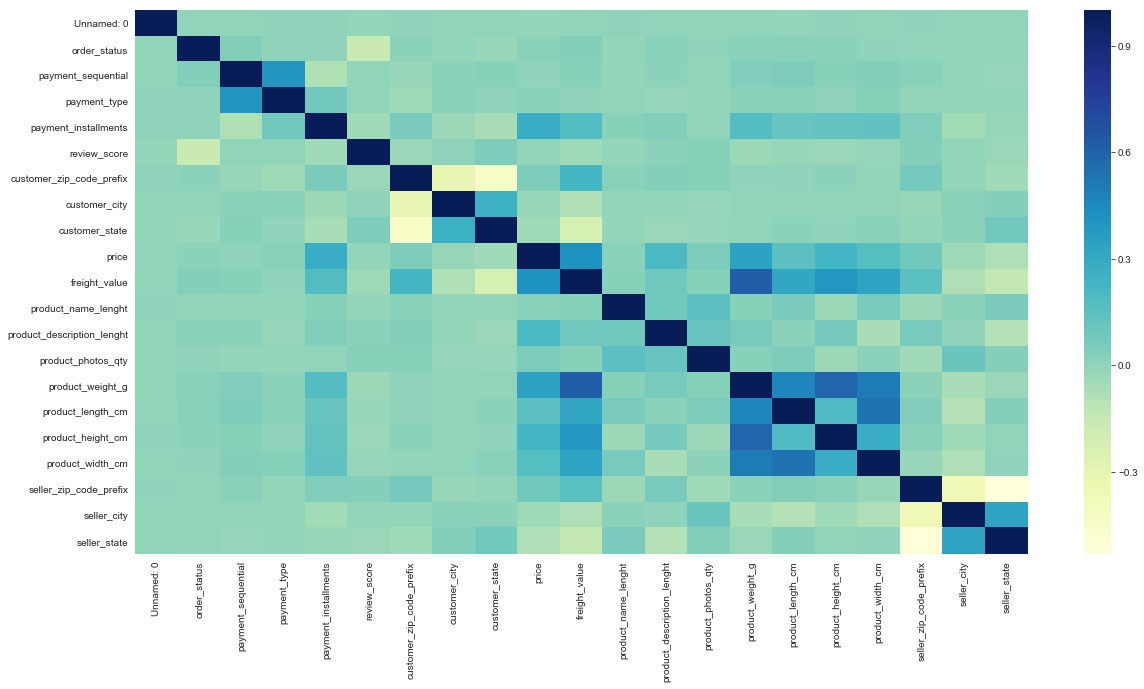

In [62]:
fig, ax =  plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=False,cmap="YlGnBu",ax=ax)

## Creating our models
Here we will fit a model to our different features. We will see what value for R^2 we get and try different models in order to minimise our error and maximise our R^2.


### Simple Linear Model
This fits a simple linear regression model to our data.


In [20]:
X, Y, X_test, y_test, Model, Test_Model= rm.cont_model(df,'price')

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


For our initial model, our values are:
Training r^2: 0.2524447244891891
Training MSE: 25487.913983240684
And for our testing dataset, our values are:
Training r^2: 0.2574298688199398
Training MSE: 24360.405698878036


### Ridge Regression
This method shrinks the parameters and therefore reduces the effect of multicolinearity. By doing this we also retain complexity of the model. For our data, as we don't have hundreds of parameters, this should be a good model.

In [4]:
r_model = rm.RidgeModel(X,Y)

For our improved model, are values are:
Training r^2: 0.25203596278888885
Training MSE: 25501.850722634004



### Lasso Regression
LASSO Regression (Least Absolute Shrinkage Selector Operator) -  This method reduces the values of the smaller coefficients and by doing so, selects the most important features in the model. However, if we have correlated variables it will reduce one of these variables to zero reducing the complexity of the model. This means information can be lossed. Our model doesn't have too many features however so this may not be the best model.

In [5]:
l_model = rm.LassoModel(X,Y)

For our Lasso model, are values are:
Training MSE: 26228.171674790072
Training r^2: 0.23073311863085677




### Elastic Regression
This method effectively combines Ridge and Lasso. It groups correlated variables and finds if one of them is a strong predictor. In this case, it keeps the entire group of variables, reducing information loss. Again, we don't have high levels of multicolinearity so this may not be the best model.


In [6]:
e_model = rm.ElasticModel(X,Y)

For our Elastic model, are values are:
Training MSE: 25491.85065668974
Training r^2: 0.25232926266650946



### Cross-Validation
To account for the random sampling of the training dataset, we apply cross-validation to it. For each fold in the dataset, this applies the model to k–1 folds of the dataset. Then it tests the model on the kth fold. It repeats this for each k-fold in the dataset. We average our result to find the average error and this tells us how our model has performed.

In [24]:
k=10
rm.cross_validate(Model,k,X,Y)
rm.cross_validate(Test_Model, k, X_test, y_test)

After cross-validating the data for 10-folds: 
The average Mean Squared Errors: np.mean(-25505.965086859676) 
                 The average R2: 0.2523161523869442

After cross-validating the data for 10-folds: 
The average Mean Squared Errors: np.mean(-24421.25310144052) 
                 The average R2: 0.25612365637518253

